# Data Mining Assignment 1

## Assignment Details

In this assignment, we will conduct a guided exploration over the given dataset.

We will learn and use some of the most common exploration/aggregation/descriptive operations. This should also help us learn most of the key functionalities in Python/Pandas, Weka and R. We will do Task 1, Task 2, Task 3, Task 4 using Python/Pandas, Weka, R

You will also learn how to use visualization libraries to identify patterns in data that will help in your further data analysis. You will also explore most popular chart types and how to use different libraries and styles to make your visualizations more attractive.

**Each code visualization and plotted graph needs to be explained in the 4 to 5 lines**

# Dataset Details

In this assignment, we will consider weather_dataset.csv
The columns of the data-set are:

* Date
* Time
* Temp Humidity Index   
* Outside Temperature
* WindChill
* Hi Temperature
* Low Temperature
* Outside Humidity
* DewPoint
* WindSpeed
* Hi
* Wind Direction
* Rain
* Barometer
* Inside  Temperature
* Inside  Humidity
* ArchivePeriod

## Required Python Packages
You will only use the packages imported below in this assignment. 
<br>**Do NOT import any new packages without confirming with the TA.**
<br>20 points will be deducted from the assignment if any library is used except provided below.

In [1]:
# special IPython command to prepare the notebook for matplotlib
%matplotlib inline 

#Array processing
import numpy as np
#Data analysis, wrangling and common exploratory operations
import pandas as pd
from pandas import Series, DataFrame
from itertools import chain

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns


# Reading Dataset
The Python code below reads the weather dataset into a Pandas data frame with the name df_data. 
For this code to work, the file 'database.csv' must be in the same folder as this file.

In [2]:
#read the csv file into a Pandas data frame
df_data = pd.read_csv('Weatherdataset.csv', encoding='latin1',parse_dates=["Date"],dayfirst=True)

#return the first 5 rows of the dataset
df_data.head()

,Date,Time,Temp Humidity Index,Outside Temperature,WindChill,Hi Temperature,Low Temperature,Outside Humidity,DewPoint,WindSpeed,Hi,Wind Direction,Rain,Barometer,Inside Temperature,Inside Humidity,ArchivePeriod
0,2006-05-31,09:00,9.3,9.3,9.3,9.7,9.1,55,0.8,1,7,NNW,0.0,1015.4,21.7,38,10
1,2006-05-31,09:10,10.1,10.1,10.1,10.4,9.7,53,0.9,2,5,NE,0.0,1015.3,21.9,38,10
2,2006-05-31,09:20,10.7,10.7,10.7,11.0,10.4,52,1.3,2,5,NE,0.0,1015.3,22.1,39,10
3,2006-05-31,09:30,11.2,11.2,11.2,11.3,10.9,52,1.7,1,3,NNW,0.0,1015.2,22.2,38,10
4,2006-05-31,09:40,11.4,11.4,11.4,11.6,11.3,51,1.7,2,6,E,0.0,1015.2,22.3,38,10


# Task 1: Statistical Exploratory Data Analysis
Let us start with getting know the dataset. Your first task will be to get some basic information by using Pandas features.

In [3]:
#For each task below, look for a Pandas function to do the task.
#Replace None in each task with your code.

# 1 points
#Task 1-a: Print the details of the df_data data frame (information such as number of rows,columns, name of columns, etc)
print ("Task 1-a: Details of df_data data frame are: \n")
df_data.info()
# 1 points
#Task 1-b: Find the number of rows and columns in the df_data data frame.
print ("Task 1-b: Number of rows:%s and number of columns:%s" %(len(df_data),len(df_data.columns)))

# 1 points
#Task 1-c: Print the descriptive detail (count, unique, top, freq etc) for 'Wind Direction' column of the df_data 
print ("Task 1-c: Descriptive details of 'Wind Direction' column are\n")
print(df_data['Wind Direction'].describe(include='all'))

# 1 points
#Task 1-d: Print the average Outside Temperature for each day
print("Task 1-d: The average temp for each day:\n")
print(df_data.groupby('Date')['Outside Temperature'].mean())

# 1 points
#Task 1-e: Print the average Outside Temperature for each week
print("Task 1-e: The average temp for each week:\n")
print(df_data.groupby(pd.Grouper(key='Date', axis=0, freq='W'))['Outside Temperature'].mean())
# 1 points
#Task 1-f: What is the maximum Outside Temperature difference each day for all the days of the months?
print("Task 1-f: Maximum temperature difference each day for all the days of the months:\n")
print(df_data.groupby('Date')['Outside Temperature'].max()- df_data.groupby('Date')['Outside Temperature'].min())

# 1 points
#Task 1-h: What is the minimum Outside Temperature difference each day for all the days of the months?
print("Task 1-h: Minimum temperature difference each day for all the days of the months:")
df_DD = df_data.groupby(["Date"])["Outside Temperature"].nsmallest().drop_duplicates().reset_index()

dCounter = df_DD['Date'].value_counts().reset_index()
EachD = dCounter.loc[dCounter['Date'] > 1, 'index']
df_DD = df_DD.loc[df_DD['Date'].isin(EachD), :]
print(df_DD.groupby("Date")["Outside Temperature"].nsmallest(2).diff().iloc[1::2].reset_index().iloc[:, [0, 2]])        


#Task 1-i: Display all the unique values for each column.
print("Task 1-i: The unique values for each column are:\n",)
for col in df_data:
    print("\nUnqie values in col ",col, ":\n", df_data[col].unique())




Task 1-a: Details of df_data data frame are: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4463 entries, 0 to 4462
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    4463 non-null   datetime64[ns]
 1   Time                    4463 non-null   object        
 2   Temp Humidity Index     4463 non-null   float64       
 3   Outside Temperature     4463 non-null   float64       
 4   WindChill               4463 non-null   float64       
 5   Hi Temperature          4463 non-null   float64       
 6   Low Temperature         4463 non-null   float64       
 7   Outside Humidity        4463 non-null   int64         
 8   DewPoint                4463 non-null   float64       
 9   WindSpeed               4463 non-null   int64         
 10  Hi                      4463 non-null   int64         
 11  Wind Direction          4463 non-null   object        
 12  R

# Task 2: Aggregation & Filtering & Rank
In this task, we will perform some very high level aggregation and filtering operations. 
Then, we will apply ranking on the results for some tasks. 
Pandas has a convenient and powerful syntax for aggregation, filtering, and ranking. 
DO NOT write a for loop. Pandas has built-in functions for all tasks. 

In [5]:
# 20 points
# Task 2-A: Generate a Outside_Temperature.txt file containing the answers to the following questions: 
# Using the “Outside Temperature” values: 
# a. What is the average time of hottest daily temperature (over month); 
# b. What time of the day is the most commonly occurring hottest time; 
# c. Which are the Top Ten hottest times on distinct days, preferably sorted by date order.

df_1 = df_data[['Date','Time','Outside Temperature']]
df_2 = df_1[['Date','Time','Outside Temperature']].groupby("Date")['Outside Temperature'].max()
df_2 = df_2.to_frame().reset_index()
df_3 = pd.merge(df_1, df_2, on=["Date", "Outside Temperature"])

# 2-A-a
f = open('Outside_Temperature.txt', 'w')
# convert to datetime
df_3['time'] = pd.to_datetime(df_3['Time'])
# take difference to normalized Time
df_3['time'] = df_3['time'] - df_3['time'].dt.normalize()
# calculate mean and format
res = str(df_3['time'].mean())[7:12]
f.write('\n 2A-a : average time of hottest daily temperature (over month)\n'+res)

#2-A-b
print(df_3['Time'].value_counts().index[0])
res2 = str(df_3['Time'].value_counts().index[0])
f.write('\n 2A-b : most commonly occurring hottest time of the day\n'+res2)

#2-A-c
df_3 = df_3.sort_values(by=['Outside Temperature'],ascending=False)
df_3 = df_3.drop_duplicates(subset="Date",keep="last", inplace=False)
res3 = str(df_3[['Date', 'Time', 'Outside Temperature']].head(10).sort_values(by=["Date"]).reset_index())
f.write('\n 2A-c : Top Ten hottest times on distinct days sorted by date order\n'+res3)
f.close()

# 20 points
#Task 2-B: Using the ‘Hi Temperature’ values produce a “Hi_Temperature.txt” file containing all of the Dates and Times
# where the “Hi Temperature” was within +/- 1 degree of 22.3 or 
# the “Low Temperature” was within +/- 0.2 degree higher or lower of 10.3 over the first 9 days of June
# Create DataFrame
df_data['Date'] = pd.to_datetime(df_data['Date'])
start_date = '2016-06-01'
end_date = '2016-06-09'
mask = (df_data['Date'] >= start_date) & (df_data['Date'] <= end_date)
  
first_nineD_June = df_data.loc[(df_data['Date'] >= pd.to_datetime('2006/06/01')) & 
                                (df_data['Date'] <= pd.to_datetime('2006/06/09'))]

first_nineD_June = first_nineD_June[['Date', 'Hi Temperature','Low Temperature', 'Time']]
first_nineD_June = first_nineD_June.loc[(first_nineD_June['Hi Temperature'] >= 21.3) & 
                      (first_nineD_June['Hi Temperature'] <= 23.3) | (first_nineD_June['Low Temperature'] >= 10.1) & 
                      (first_nineD_June['Low Temperature'] <= 10.5)] 

first_nineD_June.to_csv('Hi_Temperature.txt', index = False)

14:40


# Task 3: Visualization
In this task, you will perform a number of visualization tasks to get some intuition about the data. Visualization is a key component of exploration. You can choose to use either Matplotlib or Seaborn for plotting. The default figures generated from Matplotlib might look a bit ugly. So you might want to try Seaborn to get better figures. Seaborn has a variety of styles. Feel free to experiment with them and choose the one you like. We have earmarked 10 points for the aesthetics of your visualizations.

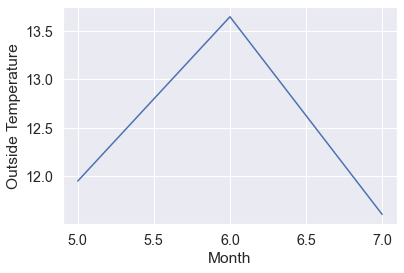

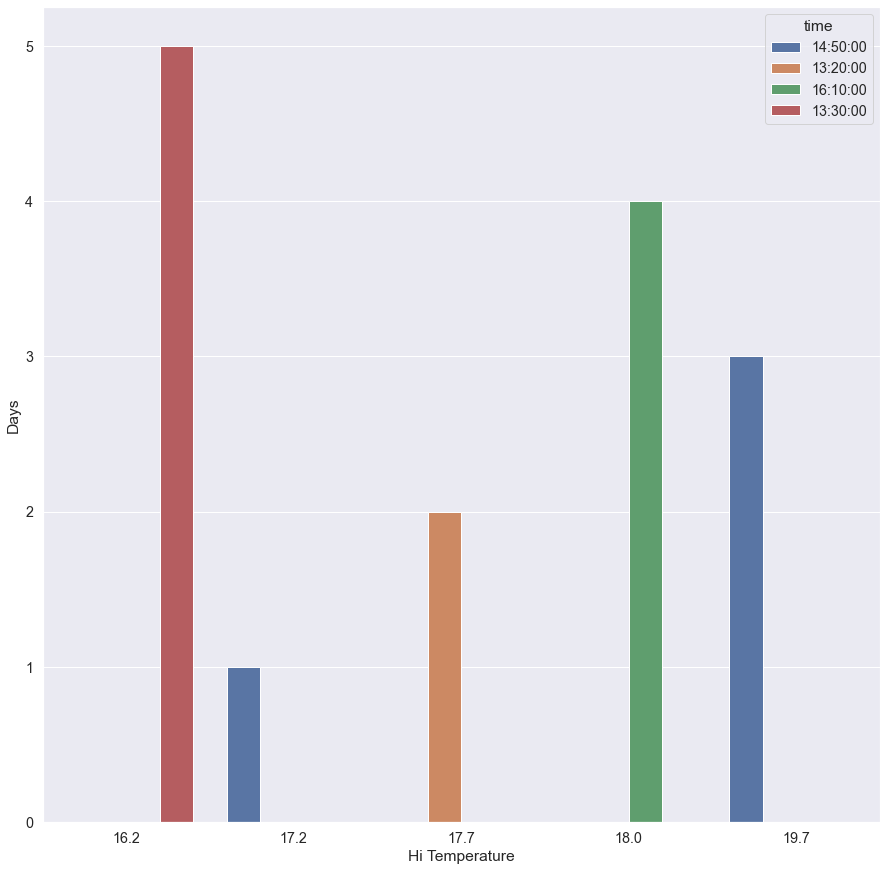

In [6]:
sns.set_style('whitegrid')
sns.set(font_scale = 1.3)

# 5 points
# Task 3-a: Visulalize the temperature for each month  
# Think of a way to nicely visualize all the temperature and provide detailed explaination 
#########################begin code for Task 3-a

df_data['Month'] = pd.DatetimeIndex(df_data['Date']).month
dframe1 = df_data['Month']
dframe2 = df_data['Outside Temperature']
frames = [dframe1,dframe2]
conc = pd.concat(frames,axis=1,join = 'inner')
result = conc.groupby(df_data['Month']).mean()
sns.lineplot(data=result, x='Month', y='Outside Temperature')

#########################end code for Task 3-a

# 15 points
# Task 3-b: Display the time period on a bar plot which has highest temperature for the first 5 days of every month
# provide detailed explaination 
#########################begin code for Task 3-b 

df_data['Days'] = df_data['Date'].dt.day
df_data['time'] = pd.to_datetime(df_data.Time, format='%H:%M').dt.time
fivedays = df_data.loc[df_data['Days'] <= 5, :]
fivedays_df = fivedays.groupby('Days')['Hi Temperature'].max().reset_index()
merged_df = pd.merge(fivedays, fivedays_df, how = 'inner', on = ['Days', 'Hi Temperature'])
merged_df_subset = merged_df[['time', 'Hi Temperature', 'Days']]
merged_DD = merged_df[['Date', 'Hi Temperature']].drop_duplicates().index
output = merged_df_subset.loc[merged_DD, :]
plt.figure(figsize = (15, 15))
sns.barplot(x = 'Hi Temperature', y = 'Days', hue = 'time', ci = None, data = output)
plt.show()
#########################end code for Task 3-b

# Task 4: 
Find out an 'interesting' information from the dataset. Create two visualization for it and explain in a 4 to 5 lines your valid reasoning. Do not copy paste from another team.
This task is worth 20 points. Your result will be judged based on the uniqueness and quality of your work (having a meaningful result and an aesthetic visualization). 

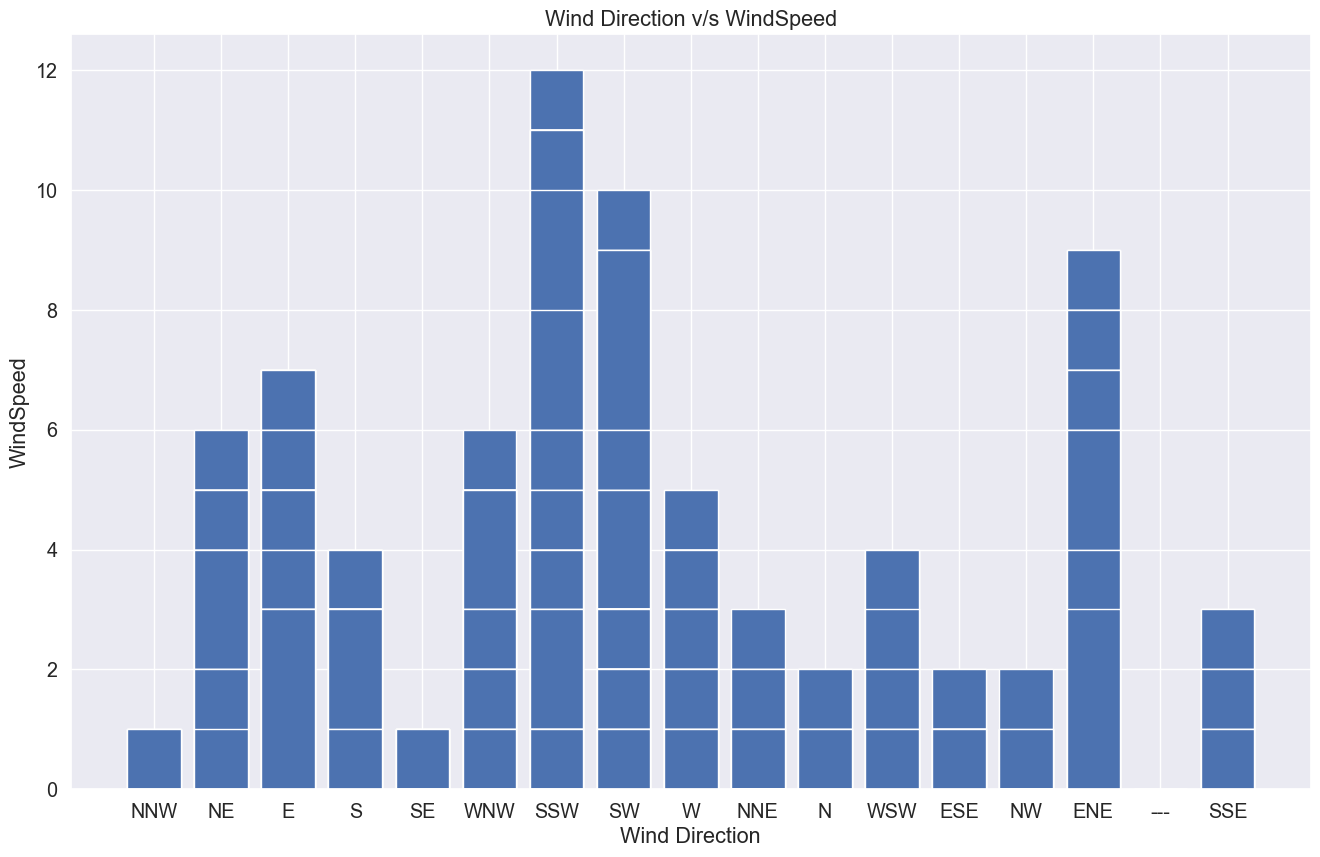

Visualizing the Wind Direction by barplot


<AxesSubplot:>

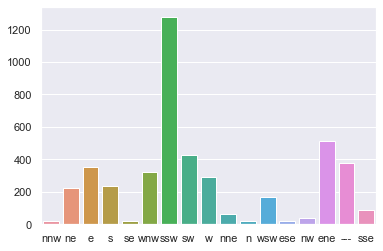

In [7]:
#########################begin code for Task 4

#Interesting Information-1
plt.figure(figsize=(16,10), dpi=100)
plt.bar (df_data['Wind Direction'], df_data['WindSpeed'])
plt.gca().set(title="Wind Direction v/s WindSpeed", xlabel="Wind Direction", ylabel='WindSpeed')
plt.show()

    
#Interesting Information-2
print("Visualizing the Wind Direction by barplot")
sns.set_style('whitegrid')
sns.set(font_scale = 1)
wind_direction={}
for win in df_data['Wind Direction']:
    win=win.lower().split(',')
    for x in win:
        dat=x.strip()
        if dat not in wind_direction:
            wind_direction[dat]=1
        else:
            wind_direction[dat]+=1
keys=list(wind_direction.keys())
values=list(wind_direction.values())
plot={}
x="Wind Direction"
y="Count"
plot[x]=keys
plot[y]=values
sns.barplot(x="Wind Direction", y="Count", data=plot)


#########################end code for Task 4